# Chapter 12

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

## Exercises

## Exercise 12-1

**Exercise:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [48]:
# Solution
import statsmodels.formula.api as smf

def RunQuadraticModel(daily):
    daily["years2"] = daily.years ** 2
    model = smf.ols('ppg ~ years + years2', data = daily)
    results = model.fit()
    return model, results

In [49]:
# Solution
daily = dailies["high"]
model, results = RunQuadraticModel(daily)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     376.9
Date:                Sat, 21 May 2022   Prob (F-statistic):          1.47e-128
Time:                        21:02:12   Log-Likelihood:                -1708.9
No. Observations:                1241   AIC:                             3424.
Df Residuals:                    1238   BIC:                             3439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0075      0.079    177.442      0.000      13.853      14.162
years         -1.1145      0.099    -11.212      0.000      -1.309      -0.919
years2         0.1099      0.027      4.144      0.000       0.058       0.162
==============================================================================
Omnibus:                       75.657   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.152
Skew:                           0.532   Prob(JB):                     3.99e-23
Kurtosis:                       3.928   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

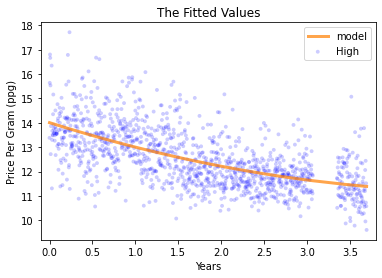

In [50]:
# Solution
PlotFittedValues(model, results, label = "High")
thinkplot.Config(title = "The Fitted Values",
                 xlabel = "Years",
                 xlim = [-0.1, 3.8],
                 ylabel = "Price Per Gram (ppg)")

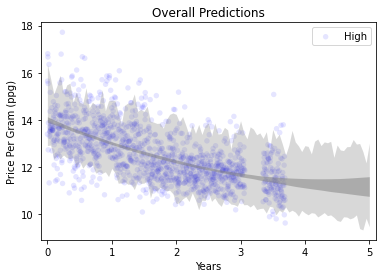

In [51]:
# Solution
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha = 0.1, label = "High")
PlotPredictions(daily, years, func = RunQuadraticModel)
thinkplot.Config(title = "Overall Predictions",
                 xlabel = "Years",
                 xlim = [years[0]-0.1, years[-1]+0.1],
                 ylabel = "Price Per Gram (ppg)")

## Exercise 12-2

**Exercise:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [52]:
# Solution
class SerialCorrelationTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [54]:
# Solution
daily = dailies["high"]

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.42812495677312584 0.0


In [55]:
# Solution
model, results = RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue) 

0.0938456276021163 0.0


In [56]:
# Solution
model, results = RunQuadraticModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.08080464889822063 0.004
